In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
customer_data = pd.read_csv('Bank_Customer_Churn_dataset.csv')

In [ ]:
customer_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset = customer_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [ ]:
dataset =  dataset.drop(['Geography', 'Gender'], axis=1)

In [ ]:
Geography = pd.get_dummies(customer_data.Geography).iloc[:,1:]
Gender = pd.get_dummies(customer_data.Gender).iloc[:,1:]

In [ ]:
dataset = pd.concat([dataset,Geography,Gender],axis=1)
dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
X =  dataset.drop(['Exited'], axis=1)
y = dataset['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(X_train, y_train)  
predictions = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions ))  
print(accuracy_score(y_test, predictions ))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.73      0.51      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

0.8635


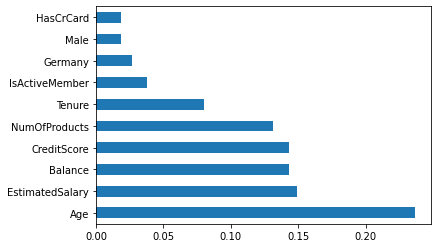

In [ ]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [ ]:
'''
Observations :
Hence, based on the bar graph plotted above it can be concluded that age has the highest impact on customer churn, followed by a customer's estimated salary and then account balance.
'''

"\nObservations :\nHence, based on the bar graph plotted above it can be concluded that age has the highest impact on customer churn, followed by a customer's estimated salary and then account balance.\n"